In [1]:
import os
import re
import glob
import json
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from tqdm import tqdm

from itertools import chain
from collections import Counter

In [ ]:
# d_connection = pd.read_csv("../data/supports/connection.csv")
# d_connection["from"], d_connection["to"] = d_connection.connection.str.split(" - ").str
# d_connection.to_csv("../data/supports/connection_unpacked.csv", index=False)

In [2]:
d_connection = pd.read_csv("../data/supports/connection_unpacked.csv")

In [3]:
d_label = pd.read_csv('../data/account_labeled/project_12_labels_Thu_Oct_15_2020.csv')

In [4]:
d_connection.columns = ['connection', 'frequency', 'from_user', 'to_user']

In [5]:
d_connection.head()

,connection,frequency,from_user,to_user
0,212Ujee2 - Par3w4_Minang,2,212Ujee2,Par3w4_Minang
1,212Ujee2 - __p3jalan____,52,212Ujee2,__p3jalan____
2,212Ujee2 - _garuda501,56,212Ujee2,_garuda501
3,212Ujee2 - Kanseulir,84,212Ujee2,Kanseulir
4,212Ujee2 - EW1jaya,41,212Ujee2,EW1jaya


In [6]:
d_connection.shape

(944165, 4)

In [7]:
d_connection.loc[d_connection.to_user.isna(), "to_user"] = "null"

In [8]:
d_label.loc[:, 'username'] = d_label.Text.apply(lambda x: x.split()[0].strip().split('/')[-1])

In [9]:
d_label.Label.unique()

array(['buzzer', 'non-buzzer', 'inactive'], dtype=object)

In [10]:
list_of_buzzer = d_label.loc[d_label.Label=='buzzer', 'username'].tolist()

In [11]:
list_of_non_buzzer = d_label.loc[d_label.Label=='non-buzzer', 'username'].tolist()

## Network Analysis

In [12]:
d_connection.sort_values(by="frequency", ascending=False)

,connection,frequency,from_user,to_user
87982,Tyo_rahj - _PASMANTAP,1432,Tyo_rahj,_PASMANTAP
87981,Tyo_rahj - Juanes_baretta,1233,Tyo_rahj,Juanes_baretta
87988,Tyo_rahj - SasiKiron0,1184,Tyo_rahj,SasiKiron0
87989,Tyo_rahj - garda_nuza,1098,Tyo_rahj,garda_nuza
53795,lawanpatriarki - the_magdalene,1090,lawanpatriarki,the_magdalene
...,...,...,...,...
388054,ffajrin_ - Fa_Roky,1,ffajrin_,Fa_Roky
388055,ffajrin_ - ismailfahmi,1,ffajrin_,ismailfahmi
388056,ffajrin_ - macaronk1120,1,ffajrin_,macaronk1120
388057,ffajrin_ - kamalbukankemal,1,ffajrin_,kamalbukankemal


In [13]:
## filter frequency > 10
d_connection_filtered = d_connection[d_connection.frequency > 50]

In [14]:
d_connection_filtered.shape

(3790, 4)

In [15]:
d_connection_filtered.loc[:, "is_self_mentioned"] = d_connection_filtered.from_user == d_connection_filtered.to_user

/home/andreas/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/andreas/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [16]:
d_connection_filtered = d_connection_filtered[d_connection_filtered.is_self_mentioned == False]

In [17]:
d_connection_filtered.shape

(3583, 5)

In [18]:
list_of_nodes = np.concatenate([d_connection_filtered.from_user.unique(), d_connection_filtered.to_user.unique()])

In [19]:
list_of_nodes = np.unique(list_of_nodes)

In [20]:
d_connection_filtered.loc[d_connection_filtered.index, "edges"] = d_connection_filtered.apply(lambda x: (x["from_user"], x["to_user"]), axis = 1)

In [21]:
list_of_edges = d_connection_filtered.edges.values

In [22]:
list_of_nodes.shape

(3106,)

In [23]:
list_of_edges.shape

(3583,)

### draw network

In [24]:
list_of_colors = []
for node in list_of_nodes:
    if node in list_of_buzzer:
        list_of_colors.append('red')
    elif node in list_of_non_buzzer:
        list_of_colors.append('green')
    else:
        list_of_colors.append('blue')

In [25]:
G = nx.Graph()

In [26]:
G.add_nodes_from(list_of_nodes)
G.add_edges_from(list_of_edges)

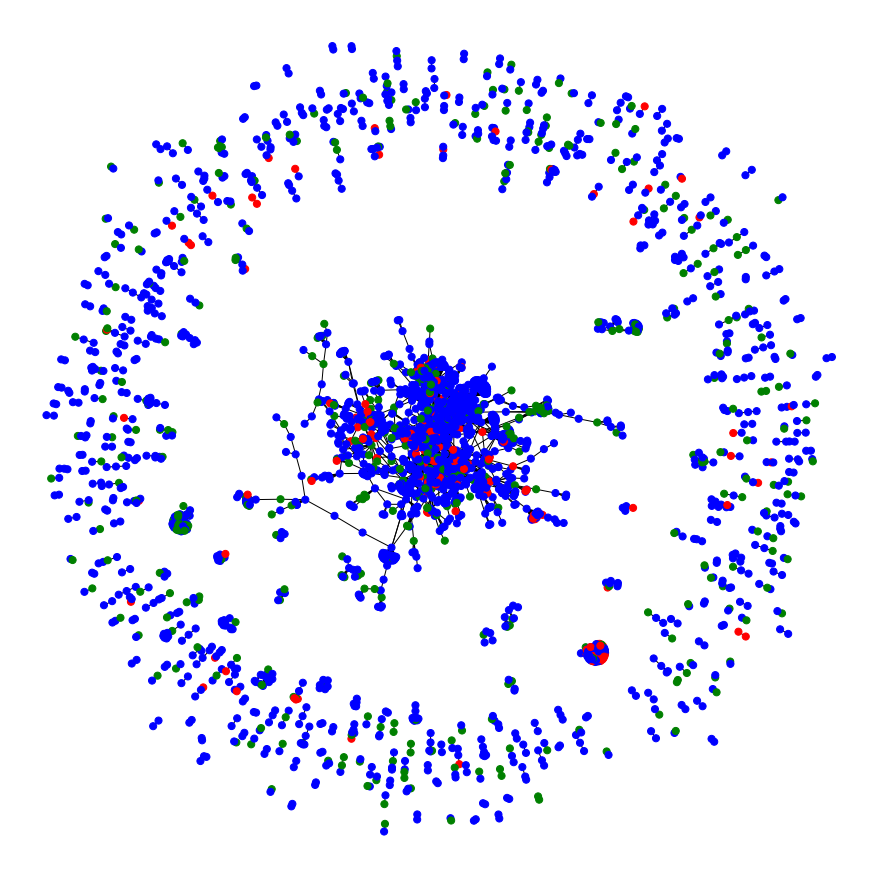

In [30]:
plt.figure(figsize=(12,12))
nx.draw(G, with_labels=False, node_color=list_of_colors, node_size=50, font_size=5)
plt.savefig("../data/figures/network_3.png")

## Analysis on Unobserved Users

In [ ]:
mentioned = d_connection.to_user.values.tolist()

In [ ]:
len(mentioned)

In [ ]:
all_files = sevenk_files + initial_files

In [ ]:
all_files = list(map(lambda x: x.replace(".json", ""), all_files))

In [ ]:
user_no_data = set(mentioned) - set(all_files)

In [ ]:
# total username that we haven't get
len(user_no_data)

# Analysis on Tweet Interaction

In [ ]:
with open("../data/supports/id_tweet_connection.json", "r") as f:
    d_id_tweets = json.load(f)

In [ ]:
d_id_tweets = pd.DataFrame(d_id_tweets)

In [ ]:
d_id_tweets.type.value_counts()

In [ ]:
d_id_tweets["from_id_tweet"], d_id_tweets["to_id_tweet"] = d_id_tweets.id_tweets.str

In [ ]:
d_id_tweets.from_id_tweet.value_counts()

In [ ]:
d_id_tweets.to_id_tweet.value_counts()

In [ ]:
d_id_tweets[d_id_tweets.to_id_tweet.isin(["3319260420"])]